<a href="https://colab.research.google.com/github/anacasicande/Modelamiento/blob/main/shooting_tarea_jacob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

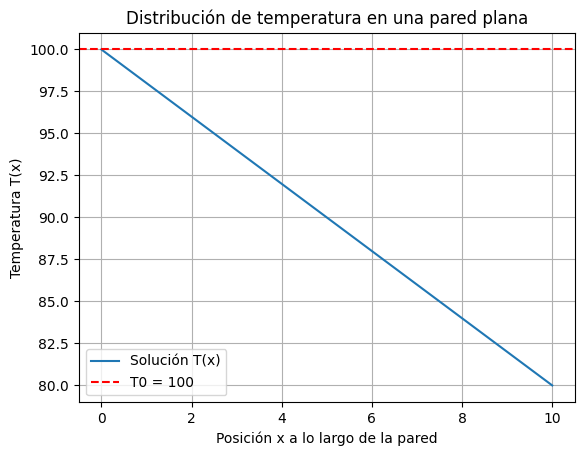

El valor óptimo de dT/dx(0) es: -2.0000000000000027


In [8]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import fmin
import matplotlib.pyplot as plt

# Definir parámetros ajustados del problema
T0 = 100      # Condición en x=0
L = 10       # Espesor de la pared
k = 0.5       # Conductividad térmica
q = 1.0      # Flujo de calor en x = L

# Definir el sistema de ecuaciones diferenciales para el problema
def sistema_ecuaciones(x, y):
    T, dTdx = y
    d2Tdx2 = 0  # La ecuación es d2T/dx2 = 0
    return [dTdx, d2Tdx2]

# Función para disparar (shooting method)
def disparo(dT0):
    # Condiciones iniciales [T(0), dT/dx(0)]
    y0 = [T0, dT0]
    # Resolver la ODE desde 0 hasta L
    sol = solve_ivp(sistema_ecuaciones, [0, L], y0, t_eval=np.linspace(0, L, 100))
    return sol

# Función de error que compara la derivada en x=L con el flujo de calor deseado
def error_shooting(dT0):
    # Ensure dT0 is a scalar, not an array-like
    dT0 = dT0[0] if isinstance(dT0, np.ndarray) else dT0
    sol = disparo(dT0)
    dTdx_L = sol.y[1, -1]  # Valor de dT/dx en x=L
    return abs(-k * dTdx_L - q)  # Condición de contorno en x=L

# Minimizar el error usando fmin (ajustar el valor inicial dT0)
sol_shooting = fmin(error_shooting, x0=[1.0], disp=False)  # Se inicia con un valor escalar

# Obtener la solución final usando el valor de dT/dx(0) obtenido
sol_final = disparo(sol_shooting[0])

# Graficar la solución
x_vals = sol_final.t
T_vals = sol_final.y[0]

plt.plot(x_vals, T_vals, label=f"Solución T(x)")
plt.xlabel('Posición x a lo largo de la pared')
plt.ylabel('Temperatura T(x)')
plt.title('Distribución de temperatura en una pared plana')
plt.axhline(y=T0, color='r', linestyle='--', label=f'T0 = {T0}')
plt.legend()
plt.grid(True)
plt.show()

# Devolver el valor óptimo de dT/dx(0)
print(f"El valor óptimo de dT/dx(0) es: {sol_shooting[0]}")

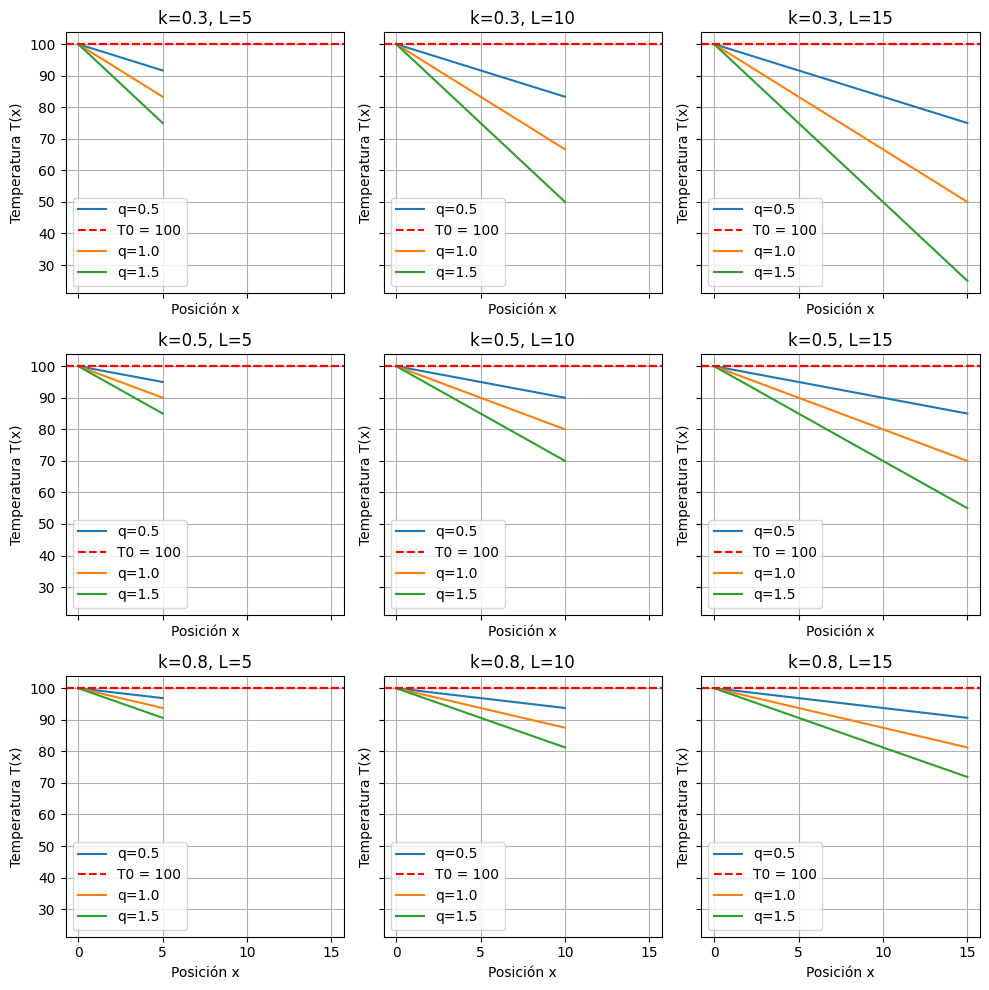

In [13]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import fmin
import matplotlib.pyplot as plt

# Parámetros fijos
T0 = 100     # Condición en x=0
parametros_k = [0.3, 0.5, 0.8]  # Diferentes valores de conductividad térmica
parametros_L = [5, 10, 15]      # Diferentes valores de espesor de la pared
parametros_q = [0.5, 1.0, 1.5]  # Diferentes valores de flujo de calor en x = L

# Definir el sistema de ecuaciones diferenciales para el problema
def sistema_ecuaciones(x, y):
    T, dTdx = y
    d2Tdx2 = 0  # La ecuación es d2T/dx2 = 0
    return [dTdx, d2Tdx2]

# Función para disparar (shooting method)
def disparo(dT0, L):
    # Condiciones iniciales [T(0), dT/dx(0)]
    y0 = [T0, dT0]
    # Resolver la ODE desde 0 hasta L
    sol = solve_ivp(sistema_ecuaciones, [0, L], y0, t_eval=np.linspace(0, L, 100))
    return sol

# Función de error que compara la derivada en x=L con el flujo de calor deseado
def error_shooting(dT0, k, L, q):
    dT0 = dT0[0] if isinstance(dT0, np.ndarray) else dT0
    sol = disparo(dT0, L)
    dTdx_L = sol.y[1, -1]  # Valor de dT/dx en x=L
    return abs(-k * dTdx_L - q)  # Condición de contorno en x=L

# Crear una figura y un conjunto de subplots
fig, ax = plt.subplots(len(parametros_k), len(parametros_L), figsize=(10, 10), sharex=True, sharey=True)

for i, k in enumerate(parametros_k):
    for j, L in enumerate(parametros_L):
        for q in parametros_q:
            # Minimizar el error usando fmin (ajustar el valor inicial dT0)
            sol_shooting = fmin(error_shooting, x0=[1.0], args=(k, L, q), disp=False)
            # Obtener la solución final usando el valor de dT/dx(0) obtenido
            sol_final = disparo(sol_shooting[0], L)
            x_vals = sol_final.t
            T_vals = sol_final.y[0]

            # Graficar la solución
            ax[i, j].plot(x_vals, T_vals, label=f'q={q}')
            ax[i, j].axhline(y=T0, color='r', linestyle='--', label=f'T0 = {T0}' if q == parametros_q[0] else "")
            ax[i, j].set_title(f'k={k}, L={L}')
            ax[i, j].set_xlabel('Posición x')
            ax[i, j].set_ylabel('Temperatura T(x)')
            ax[i, j].legend()
            ax[i, j].grid(True)

plt.tight_layout()
plt.show()


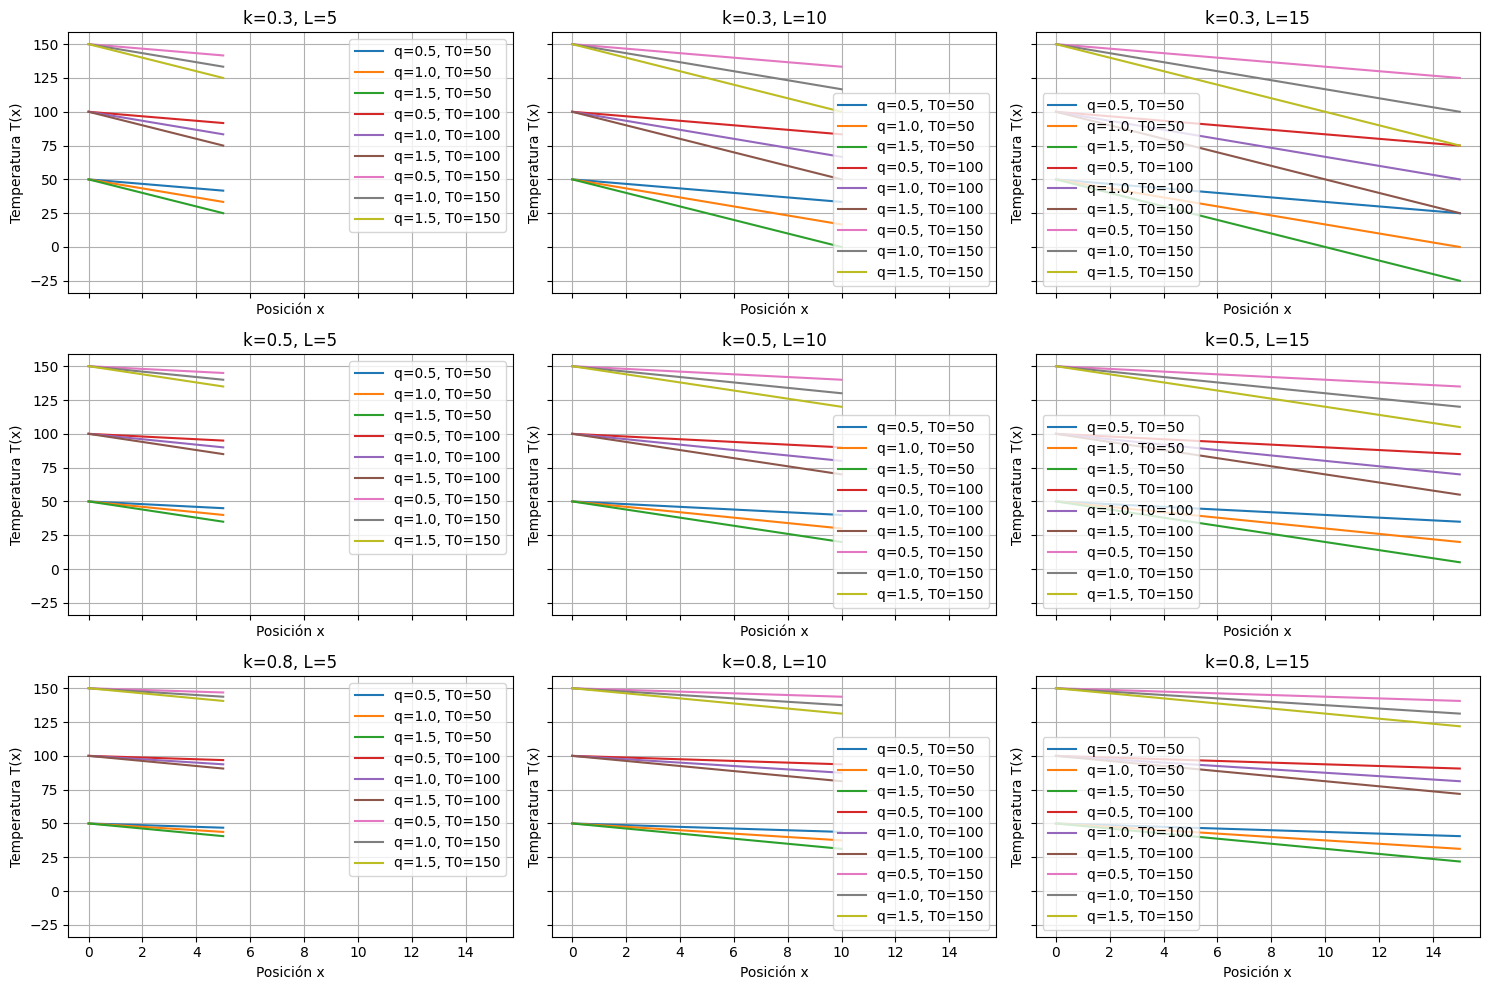

In [14]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import fmin
import matplotlib.pyplot as plt

# Parámetros variables
parametros_T0 = [50, 100, 150]  # Diferentes valores de T0 (temperatura en x=0)
parametros_k = [0.3, 0.5, 0.8]  # Diferentes valores de conductividad térmica
parametros_L = [5, 10, 15]      # Diferentes valores de espesor de la pared
parametros_q = [0.5, 1.0, 1.5]  # Diferentes valores de flujo de calor en x = L

# Definir el sistema de ecuaciones diferenciales para el problema
def sistema_ecuaciones(x, y):
    T, dTdx = y
    d2Tdx2 = 0  # La ecuación es d2T/dx2 = 0
    return [dTdx, d2Tdx2]

# Función para disparo (shooting method)
def disparo(dT0, L, T0):
    # Condiciones iniciales [T(0), dT/dx(0)]
    y0 = [T0, dT0]
    # Resolver la ODE desde 0 hasta L
    sol = solve_ivp(sistema_ecuaciones, [0, L], y0, t_eval=np.linspace(0, L, 100))
    return sol

# Función de error que compara la derivada en x=L con el flujo de calor deseado
def error_shooting(dT0, k, L, q, T0):
    dT0 = dT0[0] if isinstance(dT0, np.ndarray) else dT0
    sol = disparo(dT0, L, T0)
    dTdx_L = sol.y[1, -1]  # Valor de dT/dx en x=L
    return abs(-k * dTdx_L - q)  # Condición de contorno en x=L

# Crear una figura y subplots
fig, ax = plt.subplots(len(parametros_k), len(parametros_L), figsize=(15, 10), sharex=True, sharey=True)

for i, k in enumerate(parametros_k):
    for j, L in enumerate(parametros_L):
        for T0 in parametros_T0:
            for q in parametros_q:
                # Minimizar el error usando fmin (ajustar el valor inicial dT0)
                sol_shooting = fmin(error_shooting, x0=[1.0], args=(k, L, q, T0), disp=False)
                # Obtener la solución final usando el valor de dT/dx(0) obtenido
                sol_final = disparo(sol_shooting[0], L, T0)
                x_vals = sol_final.t
                T_vals = sol_final.y[0]

                # Graficar la solución
                ax[i, j].plot(x_vals, T_vals, label=f'q={q}, T0={T0}')
                ax[i, j].set_title(f'k={k}, L={L}')
                ax[i, j].set_xlabel('Posición x')
                ax[i, j].set_ylabel('Temperatura T(x)')
                ax[i, j].legend()
                ax[i, j].grid(True)

plt.tight_layout()
plt.show()
